# 1. KMeans

## 1.1 简单例子

In [1]:
from sklearn.cluster import KMeans
import numpy as np

In [2]:
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

In [3]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [4]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0])

In [5]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0])

In [6]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

## 1.2 多种情况效果展示

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [8]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

函数原型：
- sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)

参数解释：
- n_samples(int/array):如果参数为int，代表总样本数；如果参数为array-like，数组中的每个数代表每一簇的样本数。  
- n_features(int):样本点的维度。  
+ centers(int):样本中心数。如果样本数为int且centers=None，生成3个样本中心；如果样本数（n_samples）为数组，则centers 要么为None，要么为数组的长度。  
- cluster_std(float/sequence of floats):样本中，簇的标准差。
- center_box(pair of floats (min, max)):每个簇的上下限。
- shuffle(boolean):是否将样本打乱。
- random_state(int/RandomState instance /None):指定随机数种子，每个种子生成的序列相同，与minecraft地图种子同理。

返回类型：
- X : 样本数组 [n_samples, n_features]:产生的样本
- y : array of shape [n_samples]:每个簇的标签

### 1.2.1 给定错误聚类个数

In [9]:
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

Text(0.5,1,'Incorrect Number of Blobs')

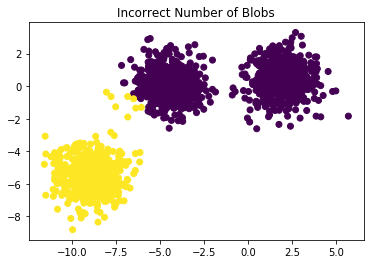

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

### 1.2.2 各向异性分布的数据

In [11]:
# 旋转数据
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

In [12]:
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

Text(0.5,1,'Anisotropicly Distributed Blobs')

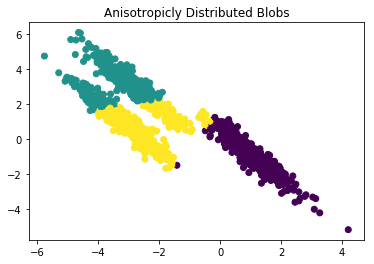

In [13]:
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

### 1.2.3 每簇的方差不同

In [14]:
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

Text(0.5,1,'Unequal Variance')

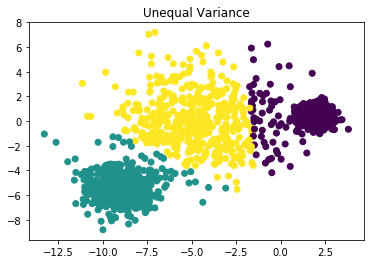

In [15]:
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

### 1.2.4 簇的大小分布不均衡

In [16]:
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

Text(0.5,1,'Unevenly Sized Blobs')

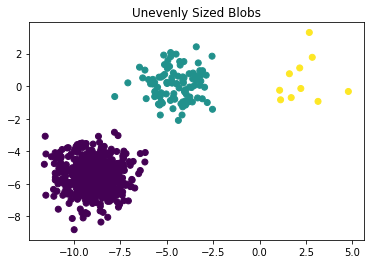

In [17]:
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

# 2. 层次聚类之凝聚聚类

## 2.1 简单例子

In [18]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [19]:
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

In [20]:
clustering = AgglomerativeClustering().fit(X)
clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func=<function mean at 0x00000218641FF158>)

In [21]:
clustering.labels_

array([1, 1, 1, 0, 0, 0], dtype=int64)

## 2.2 聚类层次树-dendrogram

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [23]:
# 随机生成数据
np.random.seed(1234)
variables = ['X','Y','Z']
labels=['ID_0','ID_1','ID_2','ID_3','ID_4']
X=np.random.random_sample([5,3])*10
df = pd.DataFrame(X,columns=variables,index=labels)
print (df)

             X         Y         Z
ID_0  1.915195  6.221088  4.377277
ID_1  7.853586  7.799758  2.725926
ID_2  2.764643  8.018722  9.581394
ID_3  8.759326  3.578173  5.009951
ID_4  6.834629  7.127020  3.702508


In [24]:
row_clusters = linkage(pdist(df,metric='euclidean'),method='complete')
print(pd.DataFrame(row_clusters,
                   columns=['row label1','row label2','distance','no. of items in clust.'],
                   index=['cluster %d'%(i+1) for i in range(row_clusters.shape[0])]))

           row label1  row label2  distance  no. of items in clust.
cluster 1         1.0         4.0  1.563509                     2.0
cluster 2         3.0         5.0  4.884559                     3.0
cluster 3         0.0         2.0  5.570985                     2.0
cluster 4         6.0         7.0  8.749445                     5.0


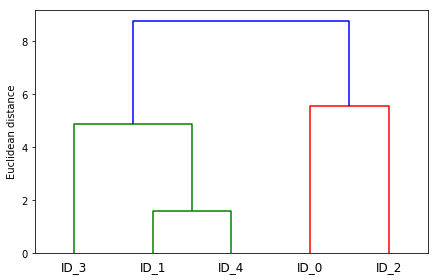

In [25]:
row_dendr = dendrogram(row_clusters,labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

# 3. DBSCAN

## 3.1 简单例子

In [26]:
from sklearn.cluster import DBSCAN
import numpy as np

In [27]:
X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 80]])

In [28]:
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering 

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=1, p=None)

In [29]:
clustering.labels_

array([ 0,  0,  0,  1,  1, -1], dtype=int64)

## 3.2 复杂例子

In [30]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [31]:
# 生成数据
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

In [32]:
# 计算DBSCAN模型
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [33]:
# 统计基本结果
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('估计的聚类个数: %d' % n_clusters_)
print('估计的噪声点个数: %d' % n_noise_)

估计的聚类个数: 3
估计的噪声点个数: 18


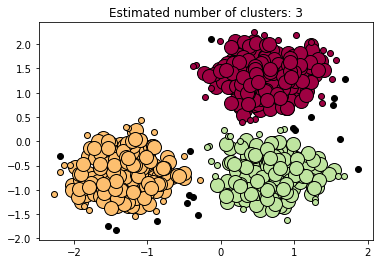

In [34]:
# 绘图展示结果
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()